In [3]:
import matplotlib.pyplot as plt
import numpy as np

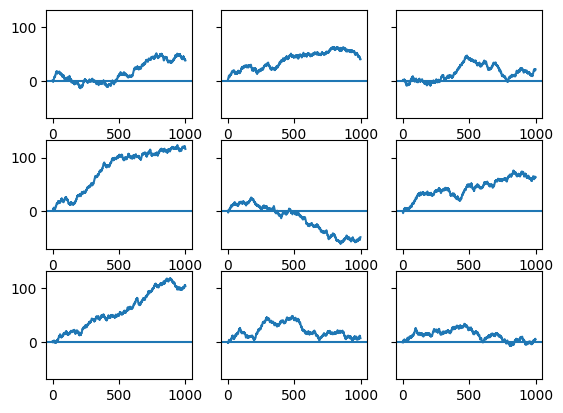

In [10]:
RANDOM_WALK_VIG = -1.1


def generate_alternating(skill_levels, determinate=False, period_length=100, periods=10):
    assert len(skill_levels) == 2, "must have 2 skill levels."

    base_data = []
    ticks_up = []
    ticks_down = []

    prev_skill = skill_levels[0]
    for x in range(periods):
        # every `period_length` days, the skill level can change.
        if determinate:
            # take the other one. not the nicest way to do it.
            skill_copy = skill_levels.copy()
            skill_copy.remove(prev_skill)
            current_skill = skill_copy[0]
        else:
            current_skill = np.random.choice(skill_levels)

        # mark every time we switch skill_levels
        if current_skill != prev_skill:
            if current_skill > prev_skill:
                ticks_up.append(x * period_length)
            elif current_skill < prev_skill:
                ticks_down.append(x * period_length)
        
        win_or_lose = (np.random.rand(period_length) < current_skill).astype("float")
        win_or_lose[win_or_lose==0] = RANDOM_WALK_VIG
        base_data.extend(win_or_lose)

        prev_skill = current_skill

    return [np.cumsum(base_data), ticks_up, ticks_down]

def plot_random_walk2(random_walks, show_partitions=False, ticks_up=None, ticks_down=None):
    fig, axs = plt.subplots(3,3, sharey='all')

    #plt.suptitle(f"random walk with p={skills[0]}, {skills[1]} randomly chosen")
    # x axis of subplot
    walk_counter = 0
    first_axis = None
    for x in range(3):
        # y axis of subplot
        for y in range(3):
            if walk_counter == 0:

                axs[x,y].plot(random_walks[walk_counter][0])
                first_axis = axs[x,y]
            else:
                axs[x,y].plot(random_walks[walk_counter][0])
                
            axs[x,y].axhline(0)
            if show_partitions:
                try:
                    axs[x,y].vlines(random_walks[walk_counter][1], 0,50, 'g')
                    axs[x,y].vlines(random_walks[walk_counter][2], 0, 50, 'r')   
                except:
                    print(f"walk counter {walk_counter}")
            walk_counter += 1
    


#TODO: have a function that returns multiple random walks (eg 9) for the graph.

data = []
skill_levels = [.50, .58]
for x in range(9):
    walk = generate_alternating(skill_levels, determinate=True)
    data.append(walk)



plot_random_walk2(data)

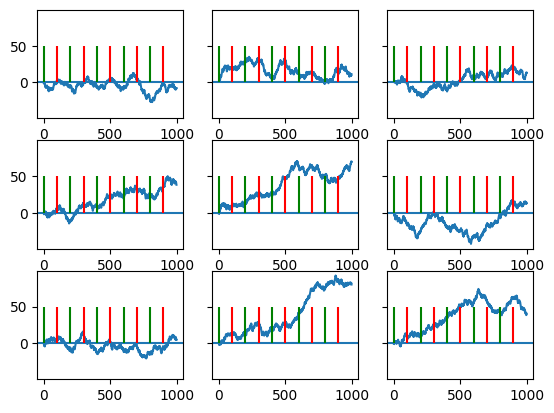

In [7]:
plot_random_walk2(data, True)